In [1]:
! pip install numpy pandas matplotlib scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

2023-10-22 00:49:07.405551: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-22 00:49:07.433606: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-22 00:49:07.433631: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-22 00:49:07.433660: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-22 00:49:07.440745: I tensorflow/core/platform/cpu_feature_g

In [3]:
train_df = pd.read_csv('archive/fashion-mnist_train.csv')
test_df = pd.read_csv('archive/fashion-mnist_test.csv')

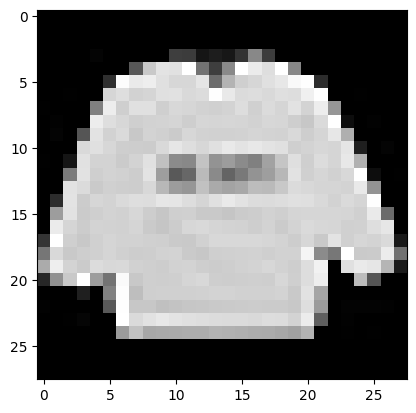

In [4]:
plt.imshow(train_df.iloc[0].values[1:].reshape(28,28),cmap='gray')

In [5]:
X_train = train_df.drop('label', axis=1)
X_test = test_df.drop('label', axis=1)
y_train = train_df['label']
y_test = test_df['label']

In [6]:
image_height = 28
image_width = 28

In [7]:
X_train_images = []
for i in range(len(X_train)):
    image_data = X_train.iloc[i].values  
    image = image_data.reshape(image_height, image_width, 1).astype(np.float32)
    X_train_images.append(image)
X_train_images = np.array(X_train_images)

In [8]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4, random_state=42)

In [9]:
X_test_images = []
for i in range(len(X_test)):
    image_data = X_test.iloc[i].values  
    image = image_data.reshape(image_height, image_width, 1).astype(np.float32)
    X_test_images.append(image)
X_test_images = np.array(X_test_images)

In [10]:
X_val_images = []
for i in range(len(X_val)):
    image_data = X_val.iloc[i].values  
    image = image_data.reshape(image_height, image_width, 1).astype(np.float32)
    X_val_images.append(image)
X_val_images = np.array(X_val_images)

In [11]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

In [12]:
model = Sequential()

model.add(Conv2D(32, 4, (4,4), activation='relu', input_shape=(image_height, image_width, 1)))
model.add(MaxPool2D(pool_size=(4,4)))

model.add(Conv2D(16, 2, (1,1), activation='relu', padding='same'))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2023-10-22 00:49:11.498287: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-22 00:49:11.501639: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-22 00:49:11.501767: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [13]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=1)

In [14]:
model.fit(X_train_images, y_train, batch_size=1000, epochs=25, callbacks=[early_stop],
          validation_data=(X_val_images, y_val), validation_batch_size=250)

Epoch 1/25


2023-10-22 00:49:12.534174: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-10-22 00:49:13.160307: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f31abc099d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-22 00:49:13.160324: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-10-22 00:49:13.163654: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-22 00:49:13.226832: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/60 [==============================] - 2s 6ms/step - loss: 3.2690 - accuracy: 0.1664 - val_loss: 1.9604 - val_accuracy: 0.3270
Epoch 2/25
60/60 [==============================] - 0s 4ms/step - loss: 1.7756 - accuracy: 0.3649 - val_loss: 1.4804 - val_accuracy: 0.4635
Epoch 3/25
60/60 [==============================] - 0s 4ms/step - loss: 1.4802 - accuracy: 0.4644 - val_loss: 1.2954 - val_accuracy: 0.5340
Epoch 4/25
60/60 [==============================] - 0s 4ms/step - loss: 1.3377 - accuracy: 0.5200 - val_loss: 1.2013 - val_accuracy: 0.5688
Epoch 5/25
60/60 [==============================] - 0s 4ms/step - loss: 1.2493 - accuracy: 0.5562 - val_loss: 1.1416 - val_accuracy: 0.5970
Epoch 6/25
60/60 [==============================] - 0s 4ms/step - loss: 1.1856 - accuracy: 0.5814 - val_loss: 1.0909 - val_accuracy: 0.6170
Epoch 7/25
60/60 [==============================] - 0s 4ms/step - loss: 1.1266 - accuracy: 0.6044 - val_loss: 1.0415 - val_accuracy: 0.6330
Epoch 8/25
60/60 [=============